#**Optimization of unplanned machine downtime**

Unplanned downtime in manufacturing refers to unexpected periods during which a system or equipment becomes unavailable, disrupting the normal workflow and production processes. It is a critical factor that significantly affects the operational efficiency and bottom-line impact of manufacturing facilities.



The factors considered in this dataset are -

Date - the date when the data was recorded.

Machine ID - Unique identifier for each machine.

Assembly Line Number - Identifier for the assembly line the machine belongs to.

Hydraulic Pressure - Hydraulic pressure reading in bars.

Coolant Pressure - Coolant pressure reading in bars.

Air System Pressure  - Air system pressure in bars.

Coolant Temperature - Temperature of the coolant.

Hydraulic Oil Temperature - Temperature of the hydraulic oil given in °C.

Spindle Bearing Temperature - Temperature of the spindle bearings in °C.

Spindle Vibration - Spindle vibration in micrometers.

Tool Vibration - Vibration of the tool in micrometers.

Spindle Speed - Spindle speed in revolutions per minute (RPM).

Voltage - Voltage reading in volts.

Torque - Torque applied in Newton-meters (Nm).

Cutting - Cutting force in kilonewtons (kN).

Downtime - The target variable indicating machine downtime - whether machine failure or not.


In [1]:
# Importing relevant libraries

import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import warnings
warnings.filterwarnings('ignore')  # to ignore warnings

In [2]:
# Loading the dataset
data = pd.read_csv('/content/Machine Downtime.csv')

In [5]:
# Checking the number of rows and columns of the data
data.shape

(2500, 16)

There are 2500 rows/records and 16 columns/fields.

In [6]:
# The columns are
data.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [8]:
#the first 5 observations of the dataset are-
data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [9]:
#the last 5 observations of the dataset are-
data.tail()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


To understand the data type and information about data, including the number of records in each column, data having null or not null, data type, the memory usage of the dataset, we use the function info().

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

The columns Date, Machine_ID, Assembly_Line_No, and Downtime are of object type. Remaining all columns are numerical.

There are missing values in all the numerical columns.

## First Moment Business Decision - Mean, Median, Mode

The descriptive statistics of numerical variables are-

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hydraulic_Pressure(bar),2490.0,101.409084,30.289301,-14.326454,76.355000,96.763486,126.415727,191.000000
Coolant_Pressure(bar),2481.0,4.947058,0.997357,0.325000,4.462464,4.939960,5.518401,11.350000
Air_System_Pressure(bar),2483.0,6.499275,0.407279,5.063480,6.217987,6.505191,6.780550,7.973992
Coolant_Temperature,2488.0,18.559887,8.554480,4.100000,10.400000,21.200000,25.600000,98.200000
Hydraulic_Oil_Temperature(°C),2484.0,47.618317,3.768674,35.200000,45.100000,47.700000,50.100000,61.400000
Spindle_Bearing_Temperature(°C),2493.0,35.063698,3.764823,22.600000,32.500000,35.100000,37.600000,49.500000
Spindle_Vibration(µm),2489.0,1.009334,0.342898,-0.461000,0.777000,1.008000,1.236000,2.000000
Tool_Vibration(µm),2489.0,25.411975,6.437142,2.161000,21.089000,25.455000,29.790000,45.726000
Spindle_Speed(RPM),2494.0,20274.792302,3852.660056,0.000000,17919.000000,20137.500000,22501.750000,27957.000000
Voltage(volts),2494.0,348.996792,45.376024,202.000000,319.000000,349.000000,380.000000,479.000000


The statistical measures - mean, standard deviation, minimum and maximum values and percentiles are obtained. 50th percentile gives the median.

The statistic summary of categorical variables -

In [12]:
data.describe(include="object").T

,count,unique,top,freq
Date,2500,164,15-03-2022,64
Machine_ID,2500,3,Makino-L1-Unit1-2013,874
Assembly_Line_No,2500,3,Shopfloor-L1,874
Downtime,2500,2,Machine_Failure,1265


The categorical columns are non-null.
Most records(64) are from the day 15-03-2022.
The 'top' column gives the mode 'freq' column gives the mode value of the categorical columns

Mean and Median of numerical variables are obtained from describe() function.

Mode is -

In [3]:
#Separating numerical columns from the rest
numerical_columns = data.select_dtypes(include=['number']).columns

In [14]:
numerical_columns

Index(['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
       'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object')

In [15]:
for col in numerical_columns:
  print('----------------------------------------------------------------------')

  mode = data[col].mode()
  print('Feature : ', col, '\nMode:\n',mode)

----------------------------------------------------------------------
Feature :  Hydraulic_Pressure(bar) 
Mode:
 0    88.279134
1    89.458747
2    90.458747
Name: Hydraulic_Pressure(bar), dtype: float64
----------------------------------------------------------------------
Feature :  Coolant_Pressure(bar) 
Mode:
 0    4.566854
1    4.842521
2    5.567857
3    5.918357
4    6.560332
5    6.839413
6    6.863944
7    6.893182
Name: Coolant_Pressure(bar), dtype: float64
----------------------------------------------------------------------
Feature :  Air_System_Pressure(bar) 
Mode:
 0     5.628717
1     5.928643
2     5.955235
3     6.011483
4     6.167549
5     6.430073
6     6.668245
7     6.753560
8     6.836188
9     6.875058
10    6.940606
Name: Air_System_Pressure(bar), dtype: float64
----------------------------------------------------------------------
Feature :  Coolant_Temperature 
Mode:
 0    26.4
Name: Coolant_Temperature, dtype: float64
--------------------------------------

## Second Moment Business Decision - Variance, Standard Deviation, Range

Standard Deviation can be derived from the describe() function.

Variance and Range -

In [16]:
# Variance
variance = data[numerical_columns].var()
variance

,0
Hydraulic_Pressure(bar),9.174417e+02
Coolant_Pressure(bar),9.947213e-01
Air_System_Pressure(bar),1.658765e-01
Coolant_Temperature,7.317912e+01
Hydraulic_Oil_Temperature(°C),1.420291e+01
Spindle_Bearing_Temperature(°C),1.417389e+01
Spindle_Vibration(µm),1.175791e-01
Tool_Vibration(µm),4.143679e+01
Spindle_Speed(RPM),1.484299e+07
Voltage(volts),2.058984e+03


In [17]:
# Range
for col in numerical_columns:
  print('----------------------------------------------------------------------')

  range = data[col].max() - data[col].min()
  print('Feature : ', col, 'Range: ',range)

----------------------------------------------------------------------
Feature :  Hydraulic_Pressure(bar) Range:  205.32645418
----------------------------------------------------------------------
Feature :  Coolant_Pressure(bar) Range:  11.025
----------------------------------------------------------------------
Feature :  Air_System_Pressure(bar) Range:  2.9105114929999996
----------------------------------------------------------------------
Feature :  Coolant_Temperature Range:  94.10000000000001
----------------------------------------------------------------------
Feature :  Hydraulic_Oil_Temperature(°C) Range:  26.199999999999996
----------------------------------------------------------------------
Feature :  Spindle_Bearing_Temperature(°C) Range:  26.9
----------------------------------------------------------------------
Feature :  Spindle_Vibration(µm) Range:  2.461
----------------------------------------------------------------------
Feature :  Tool_Vibration(µm) Range: 

## Third Moment Business Decision - Skewness

In [18]:
skewness = data[numerical_columns].skew()
skewness

,0
Hydraulic_Pressure(bar),0.197076
Coolant_Pressure(bar),0.147081
Air_System_Pressure(bar),-0.052899
Coolant_Temperature,0.108301
Hydraulic_Oil_Temperature(°C),-0.002291
Spindle_Bearing_Temperature(°C),-0.035942
Spindle_Vibration(µm),0.001532
Tool_Vibration(µm),-0.061005
Spindle_Speed(RPM),-0.172475
Voltage(volts),-0.028658


## Fourth Moment Business Decision - Kurtosis

In [19]:
kurtosis = data[numerical_columns].kurt()
kurtosis

,0
Hydraulic_Pressure(bar),-0.920292
Coolant_Pressure(bar),1.169455
Air_System_Pressure(bar),-0.001578
Coolant_Temperature,1.564639
Hydraulic_Oil_Temperature(°C),0.038164
Spindle_Bearing_Temperature(°C),-0.043862
Spindle_Vibration(µm),-0.018718
Tool_Vibration(µm),0.006451
Spindle_Speed(RPM),1.344769
Voltage(volts),-0.090328


## Handling Null Values :

In [20]:
data.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(°C),16
Spindle_Bearing_Temperature(°C),7
Spindle_Vibration(µm),11


In [ ]:
data.isnull().sum().sum()

143

So we have 143 blank spaces across 12 columns.

All are Numerical Columns. So we need to consider their skewness to decide on the imputation technique.





A skewness value close to 0 indicates symmetry.
If skewness is in the range -0.5 to 0.5, the distribution is considered approximately symmetric, and mean imputation is suitable.

On analyzing the skew values, for all the columns, the skewness is within the range -0.5 to 0.5. Therefore, mean imputation is suitable.




### Mean Imputation

In [21]:
print('Total number of null values after imputation :\n ')
for col in numerical_columns:
  data[col] = data[col].fillna(data[col].mean())
  print(col, ' : ', data[col].isnull().sum())

Total number of null values after imputation :
 
Hydraulic_Pressure(bar)  :  0
Coolant_Pressure(bar)  :  0
Air_System_Pressure(bar)  :  0
Coolant_Temperature  :  0
Hydraulic_Oil_Temperature(°C)  :  0
Spindle_Bearing_Temperature(°C)  :  0
Spindle_Vibration(µm)  :  0
Tool_Vibration(µm)  :  0
Spindle_Speed(RPM)  :  0
Voltage(volts)  :  0
Torque(Nm)  :  0
Cutting(kN)  :  0


## Checking for Duplicates:

In [22]:
data.duplicated().sum()

0

No rows are duplicated in the dataset.

## Further Analysis

Checking the number of unique or distinct values present in each column:

In [23]:
data.nunique()

,0
Date,164
Machine_ID,3
Assembly_Line_No,3
Hydraulic_Pressure(bar),1978
Coolant_Pressure(bar),1629
Air_System_Pressure(bar),2473
Coolant_Temperature,276
Hydraulic_Oil_Temperature(°C),210
Spindle_Bearing_Temperature(°C),205
Spindle_Vibration(µm),1145


In [4]:
# Separating categorical columns from the rest
cat_columns = data.select_dtypes(include=['object']).columns[1:] # Excluding 'Date' column
cat_columns

Index(['Machine_ID', 'Assembly_Line_No', 'Downtime'], dtype='object')

The unique categories in the categorical columns are -

In [25]:
unique_values = {col: data[col].unique() for col in cat_columns}
unique_values

{'Machine_ID': array(['Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015',
        'Makino-L2-Unit1-2015'], dtype=object),
 'Assembly_Line_No': array(['Shopfloor-L1', 'Shopfloor-L3', 'Shopfloor-L2'], dtype=object),
 'Downtime': array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)}

The target variable is 'Downtime'. The distribution of 'Downtime' is -

In [5]:
sns.set_style('darkgrid')

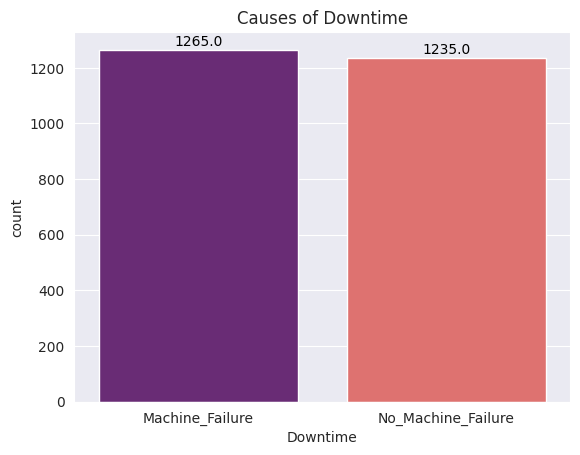

In [30]:
ax = sns.countplot(x = 'Downtime', data = data, hue ='Downtime', palette = 'magma')
#Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',         #data to be displayed
                (p.get_x() + p.get_width() / 2, p.get_height()), #(x,y) co-ordinates
                ha='center',    #horizontally centers the text on the bar.
                fontsize=10, color='black', xytext=(0,3), #text is placed slightly above the top of the bar, vertical position since x is 0
                textcoords='offset points') #for the proper placing of text

plt.title('Causes of Downtime')
plt.show()

Out of the 2500 records in the dataset, 1265 are records of machine failure and no machine failures in 1235 cases.

There are 3 unique values each in 'Machine ID' and 'Assembly Line Number'. To find out any relationship between both variables, crosstab() function is used.

In [28]:
pd.crosstab(data['Machine_ID'], data['Assembly_Line_No'], margins = True)

Assembly_Line_No,Shopfloor-L1,Shopfloor-L2,Shopfloor-L3,All
Machine_ID,,,,
Makino-L1-Unit1-2013,874,0,0,874
Makino-L2-Unit1-2015,0,808,0,808
Makino-L3-Unit1-2015,0,0,818,818
All,874,808,818,2500


From the above table it is clear that each machine is assembled on a single floor. The Makino-L1-Unit1-2013 is the most used model.

Here both columns convey the same information. It can be assumed that 'L1' in Makino-L1-Unit1-2013 denotes Shopfloor-L1. Similar for the other models too. Hence, the column 'Assembly_Line_No' can be dropped without any loss of information.

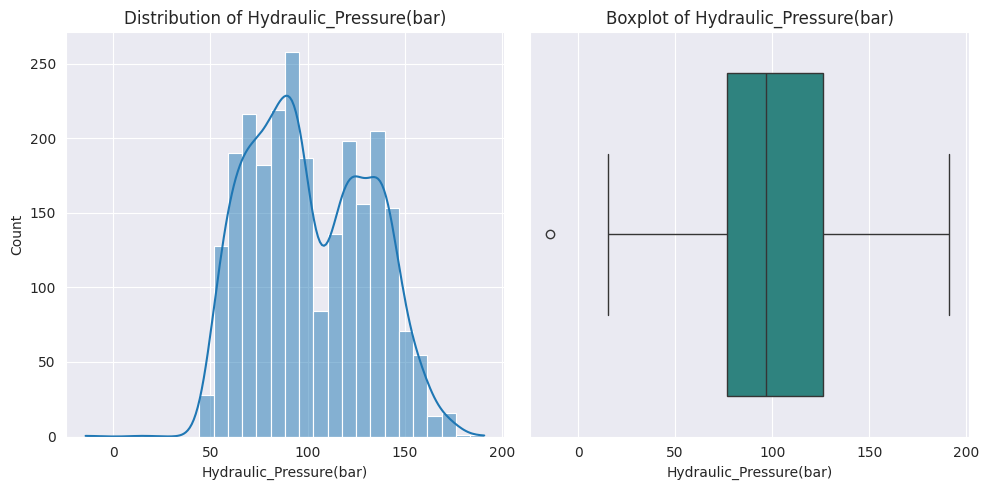

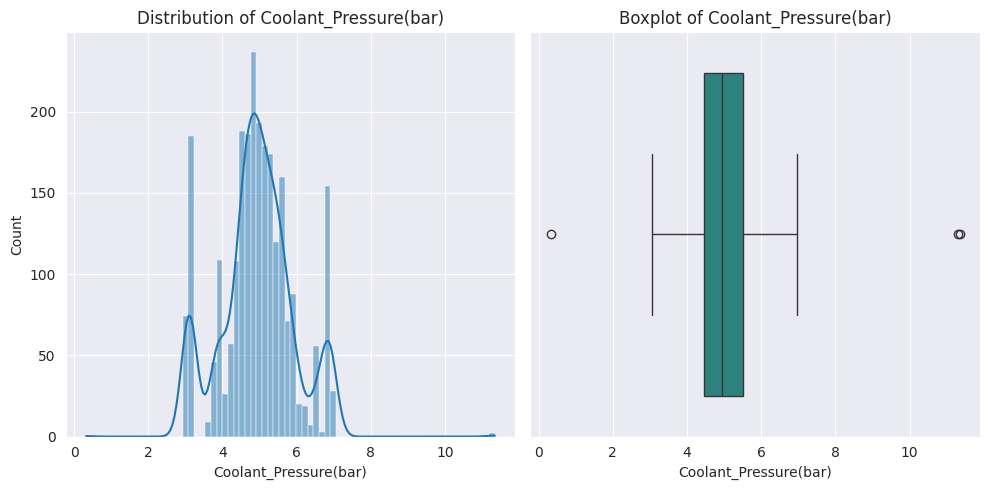

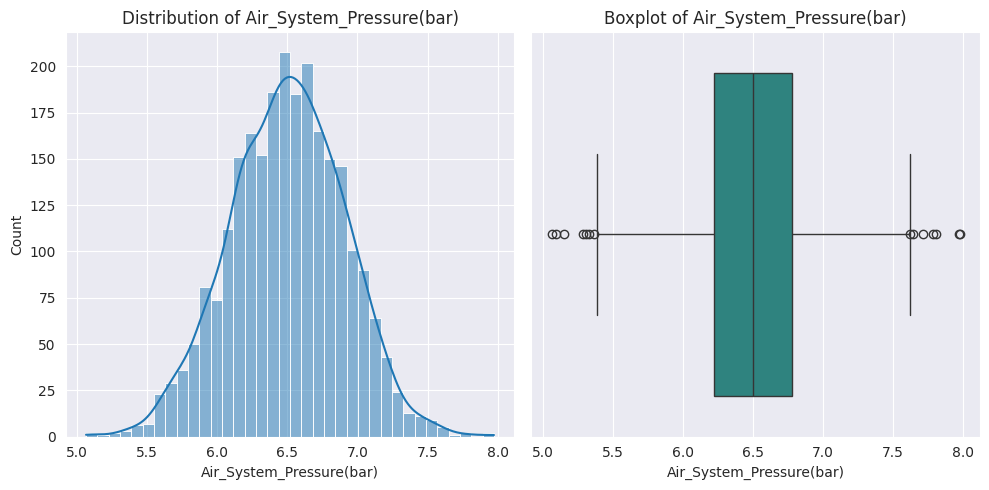

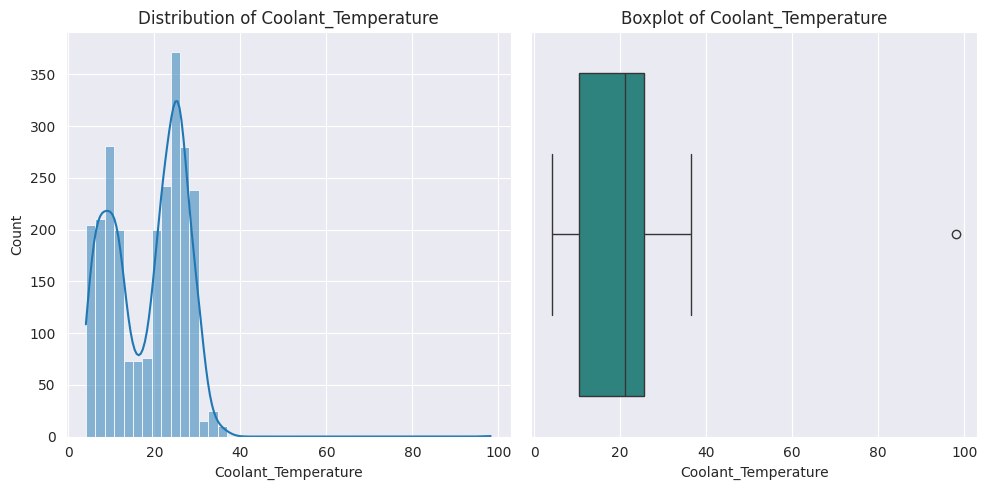

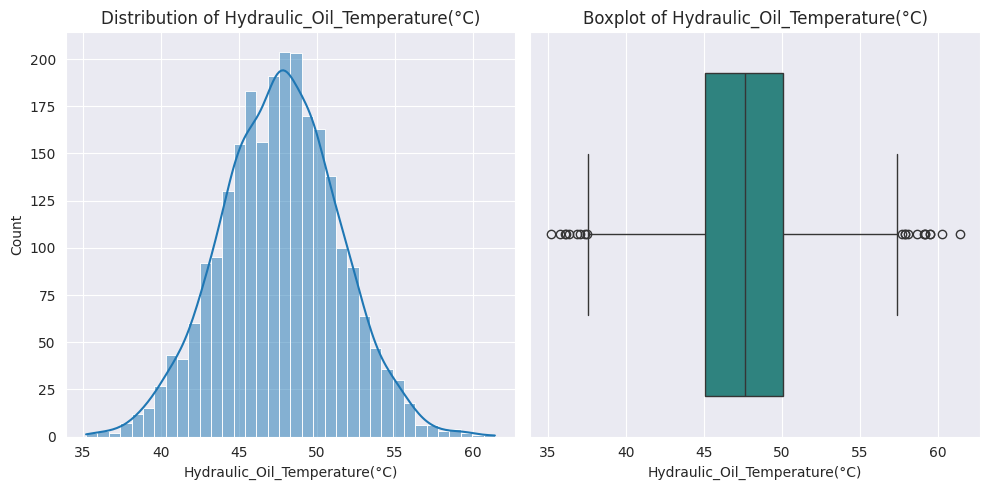

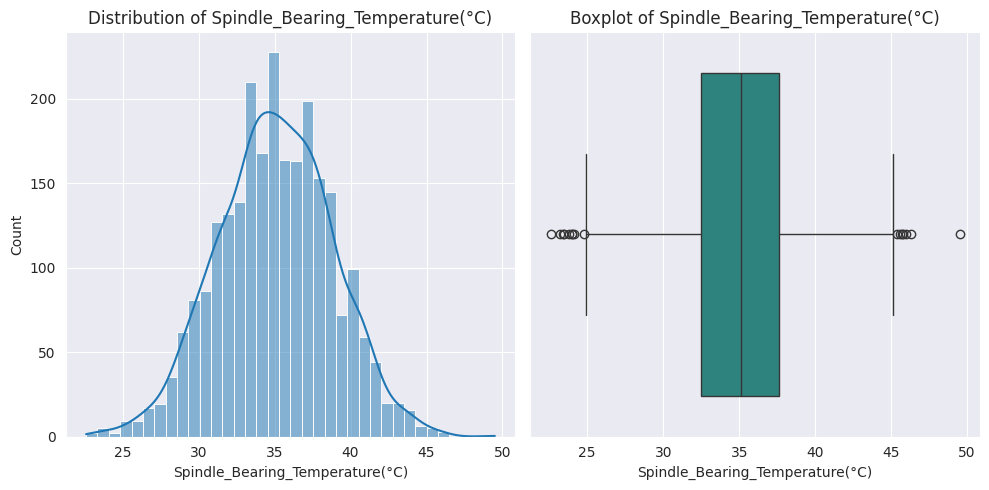

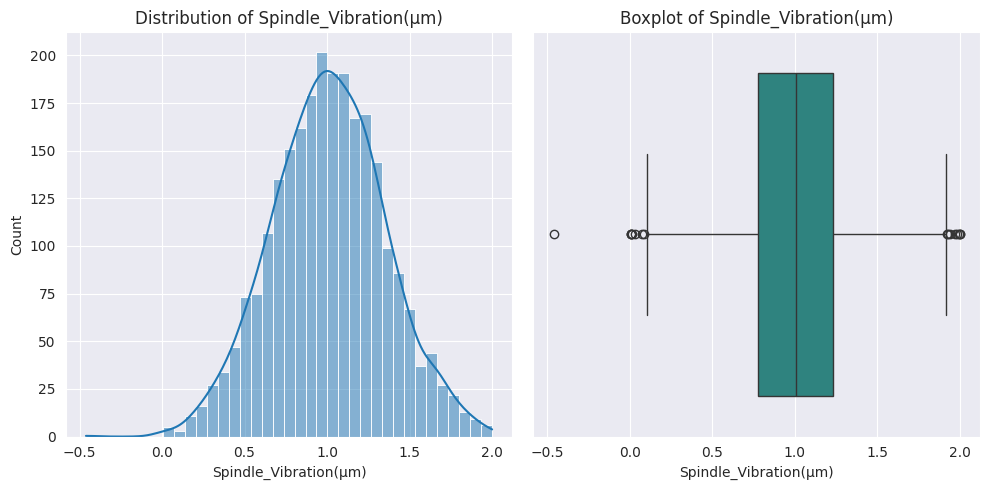

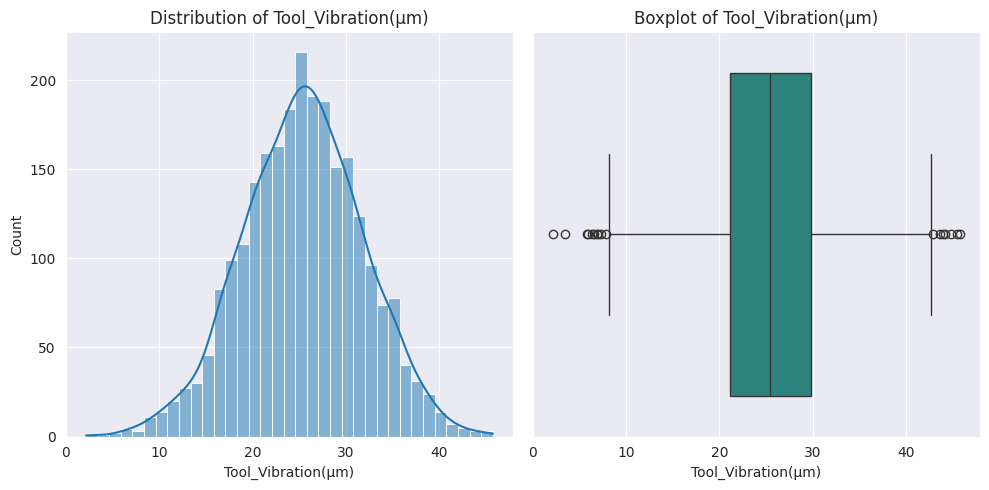

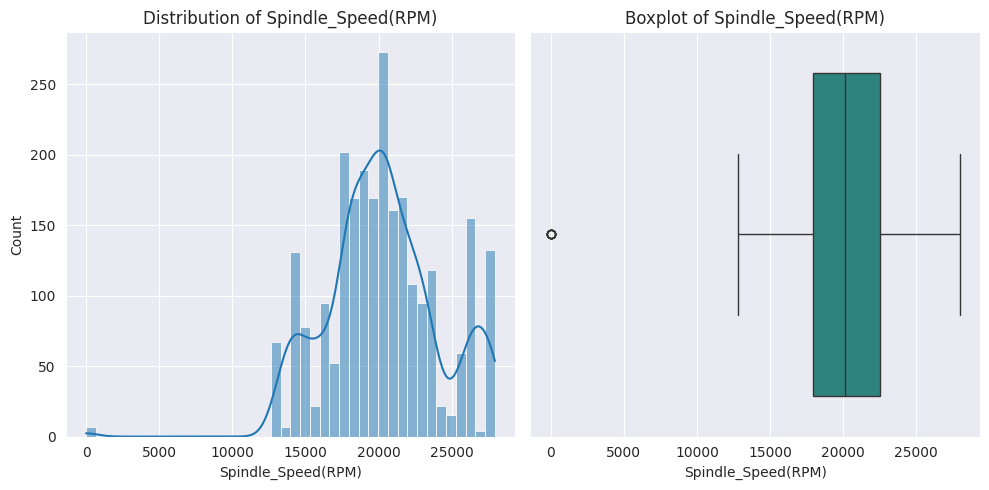

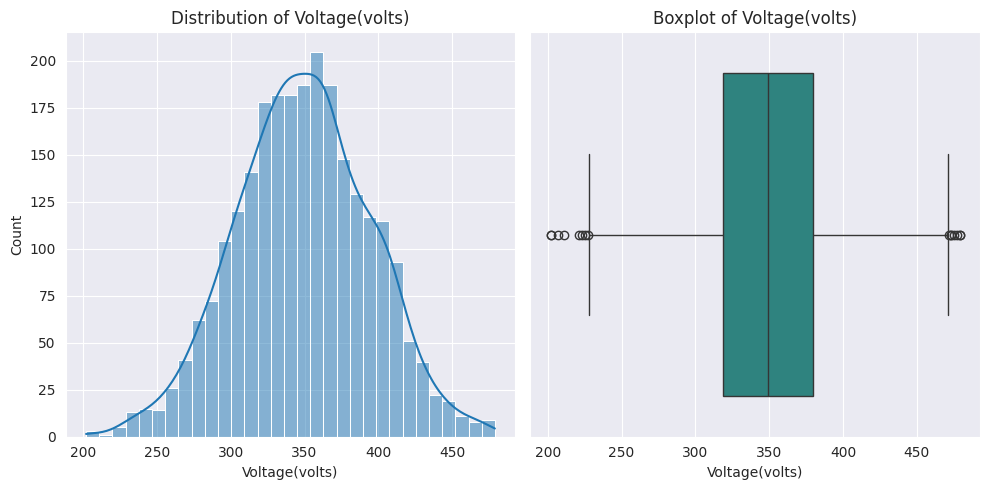

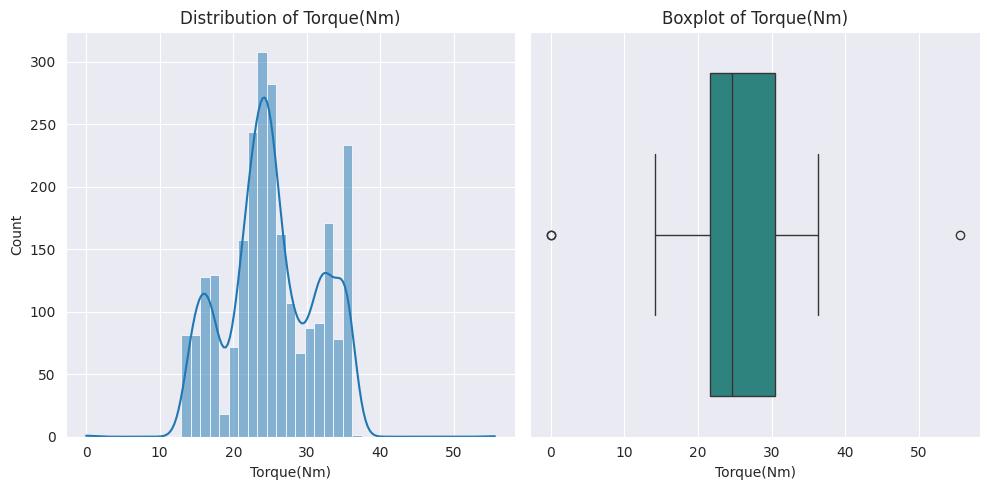

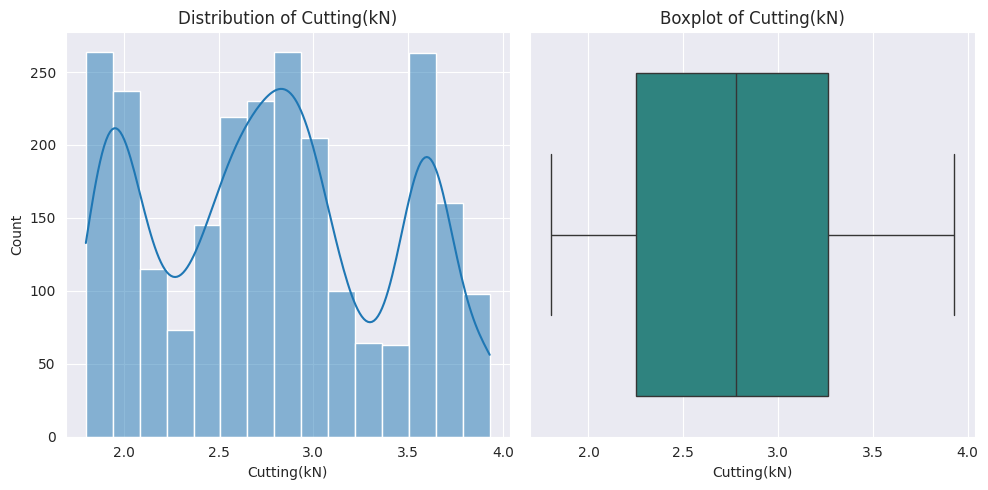

In [31]:
for col in numerical_columns:
  plt.figure(figsize=(10,5))

  # hist plot
  plt.subplot(1,2,1)
  sns.histplot(x = col, data = data, kde = True)
  plt.title(f"Distribution of {col}", fontsize=12)

  # box plot
  plt.subplot(1,2,2)
  sns.boxplot(x=col, data=data, palette='viridis')
  plt.title(f"Boxplot of {col}", fontsize=12)

  plt.tight_layout()
  plt.show()
  print('\n')

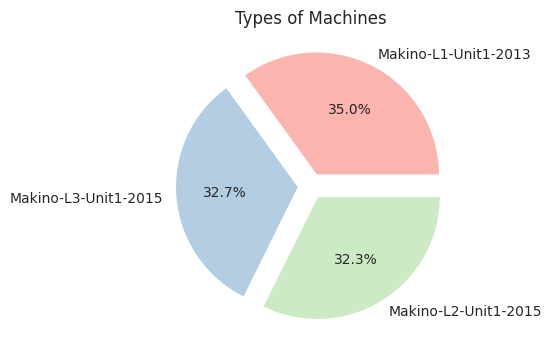

In [ ]:
machine_count = data['Machine_ID'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,4))
plt.pie(machine_count, labels = machine_count.index, explode = (0.1,0.1,0.1), autopct='%.1f%%',colors = plt.cm.Pastel1.colors)
plt.title('Types of Machines')
plt.show()

In [34]:
ctab = pd.crosstab(data['Machine_ID'], data['Downtime'], margins = True)
ctab

Downtime,Machine_Failure,No_Machine_Failure,All
Machine_ID,,,
Makino-L1-Unit1-2013,454,420,874
Makino-L2-Unit1-2015,396,412,808
Makino-L3-Unit1-2015,415,403,818
All,1265,1235,2500


Out of 874 records of downtime in Floor L1, 454 instances of downtime of Makino-L1-Unit1-2013 are due to machine failure. The other 420 instances are due to external factors.

Out of 808 records of downtime in Floor L2, 396 instances of downtime of Makino-L2-Unit1-2015 are due to machine failure. The other 412 instances are due to external factors.

Out of 818 records of downtime in Floor L3, 415 instances of downtime of Makino-L3-Unit1-2015 are due to machine failure. The other 403 instances are due to external factors.

Of all the 2500 occurences of downtime, 1265 events are due to machine failure and 1235 are due to external factors.

In [ ]:
# Cutting Forces, Torque and Spindle speed  Vs  Downtime

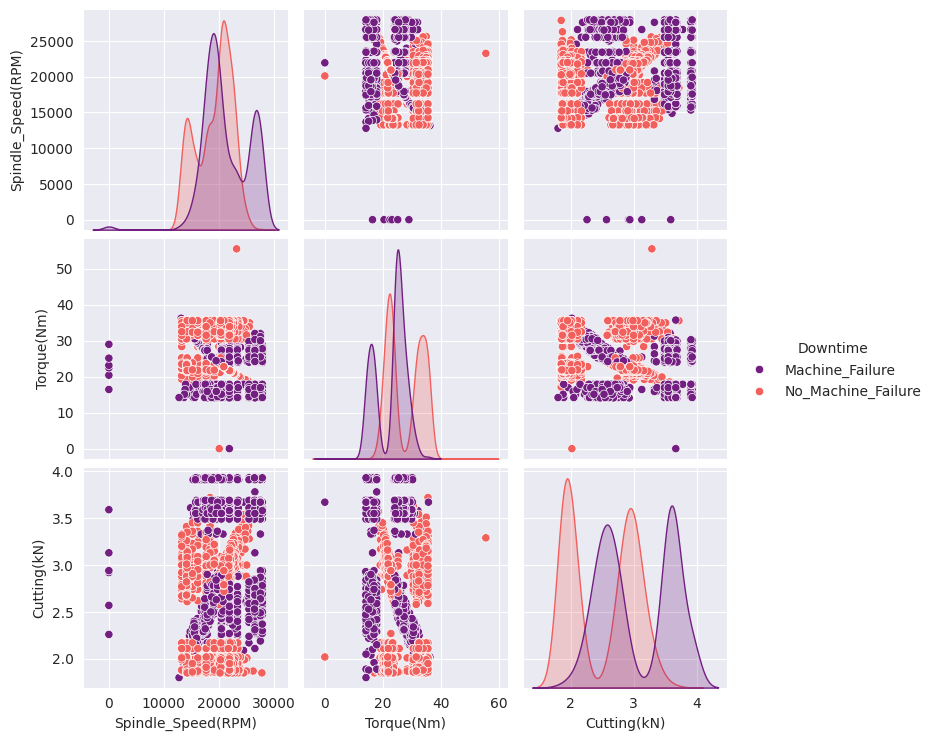

In [37]:
sns.pairplot(data=data, vars = ['Spindle_Speed(RPM)', 'Torque(Nm)', 'Cutting(kN)'], hue = 'Downtime', palette = 'magma')


Machine_failure is prominent when the spindle speed is higher and the torque values are moderate.

Higher torque values with higher spindle speed ensures that there is no_machine_failure.

If the spindle speed is zero, machine_failure occurs under all torque and cutting force conditions.

For moderate to high spindle speed ranges, if the cutting force is less, downtime will be due to external factors.

 But for higher values of cutting forces, machine_failure occurs.


The chances of breakdown of the machine during lower torque and all values of cutting forces are high.


In [ ]:
#  Voltage and forces Vs Downtime

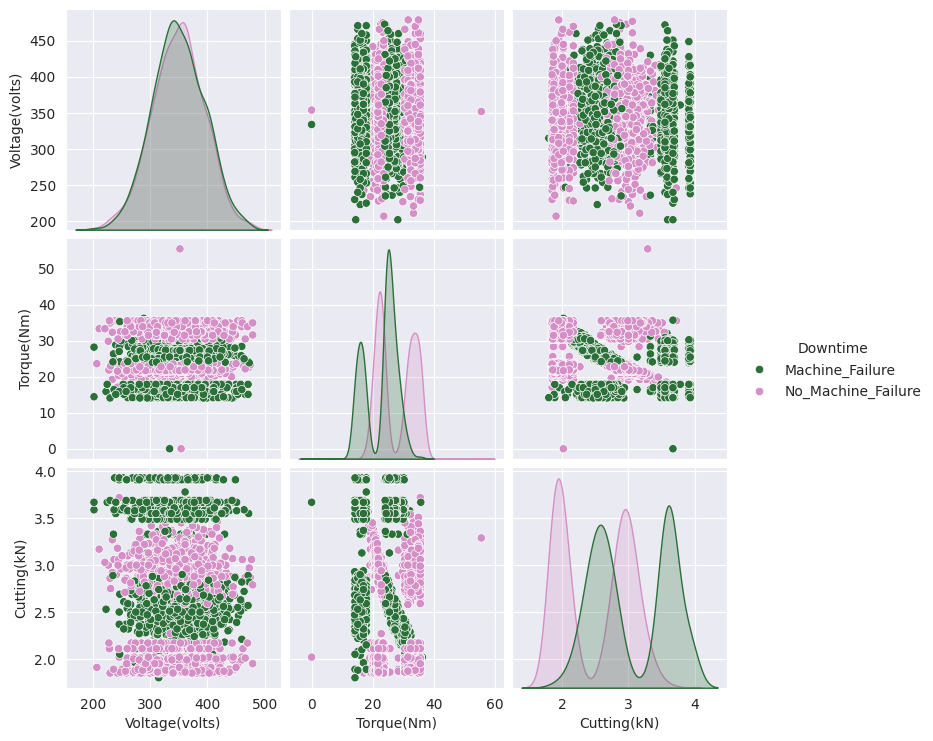

In [6]:
sns.pairplot(data, vars=[ 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'], hue = 'Downtime', palette = "cubehelix")

The distribution of voltage shows considerable overlap between mahine_failure and no-mahine_failure  cases.

Lower torque values and varying voltage values cause machine_failure. Chances of machine_failure is decreased for higher torque values.

For high cutting forces, machine_failure occurs for whatever the voltage is. But when the cutting force is lower for any voltage, downtime is due to other causes.

Lower torque for any range of cutting force results in machine_failure downtime. If the torque is higher in such cases, the possibility of downtime due to external factors is more.


In [ ]:
# Vibrations and Speed Vs Downtime :

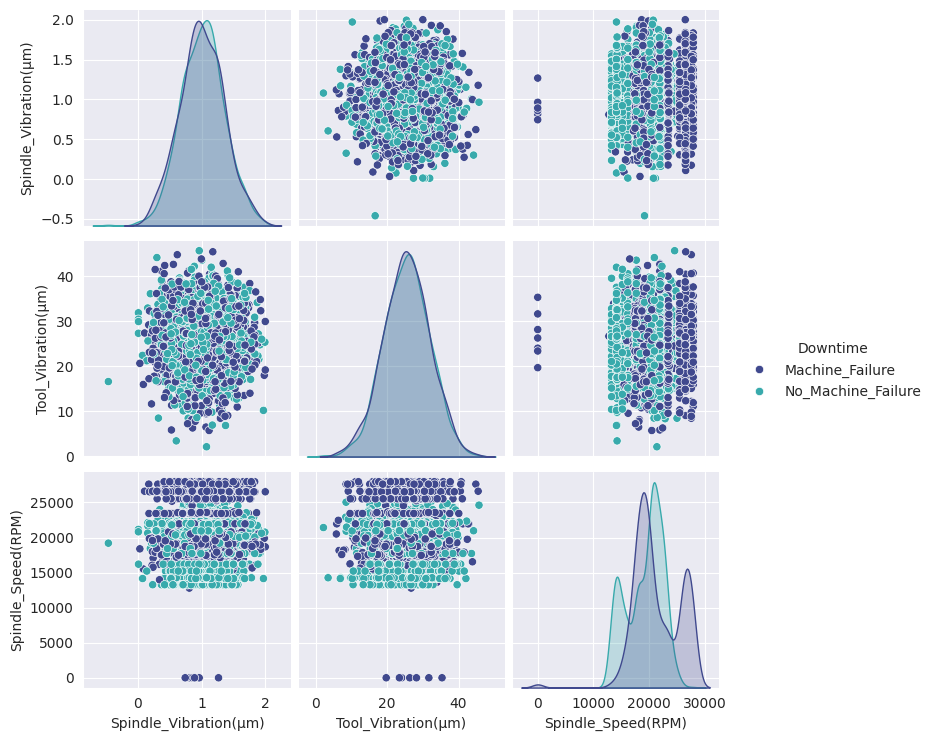

In [7]:
sns.pairplot(data, vars=[ 'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)'], hue = 'Downtime', palette='mako')

The distributions of both the vibrations overlap for no_machine_failure and machine_failure classes.

For spindle speed, greater speed causes machine_failure downtime.

When spindle speed is zero, machine_failure downtime occurs in every instance.

Higher spindle speed also favours machine_failure downtime. The downtime during lower spindle speed might be due to other external factors.


In [ ]:
# Temperatures Vs Downtime :

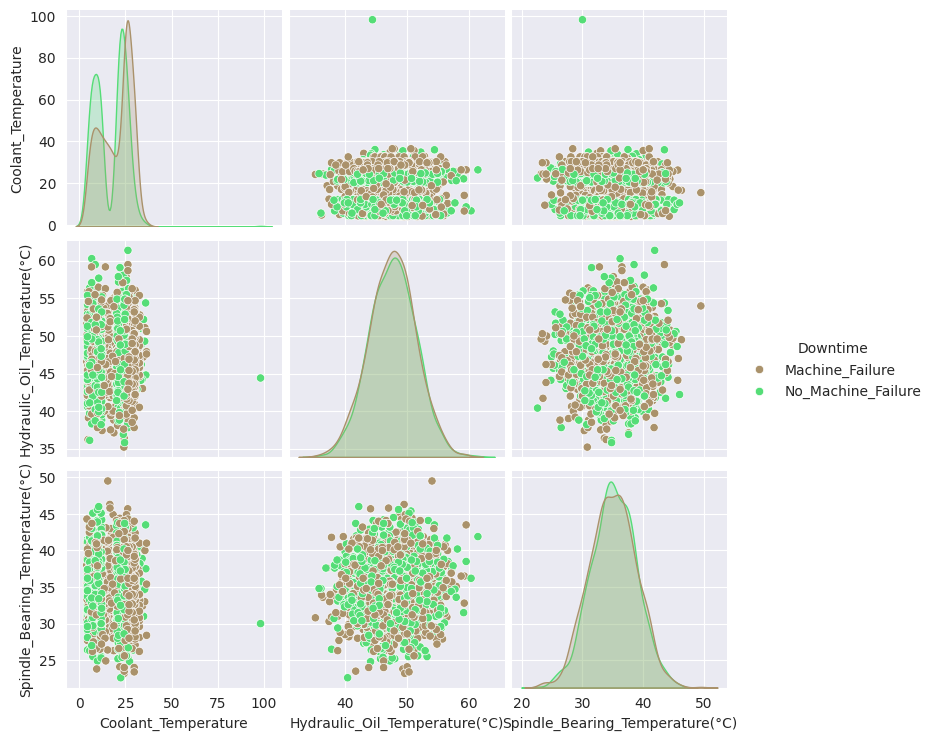

In [8]:
sns.pairplot(data, vars=['Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)'], hue = 'Downtime', palette='terrain_r')

The hydraulic oil temperature and spindle bearing temperature has overlapping symmetrical distributions for both cases of downtime.

Higher coolant temperature results in downtime due to machine failure.


In [ ]:
# Pressures Vs Downtime :

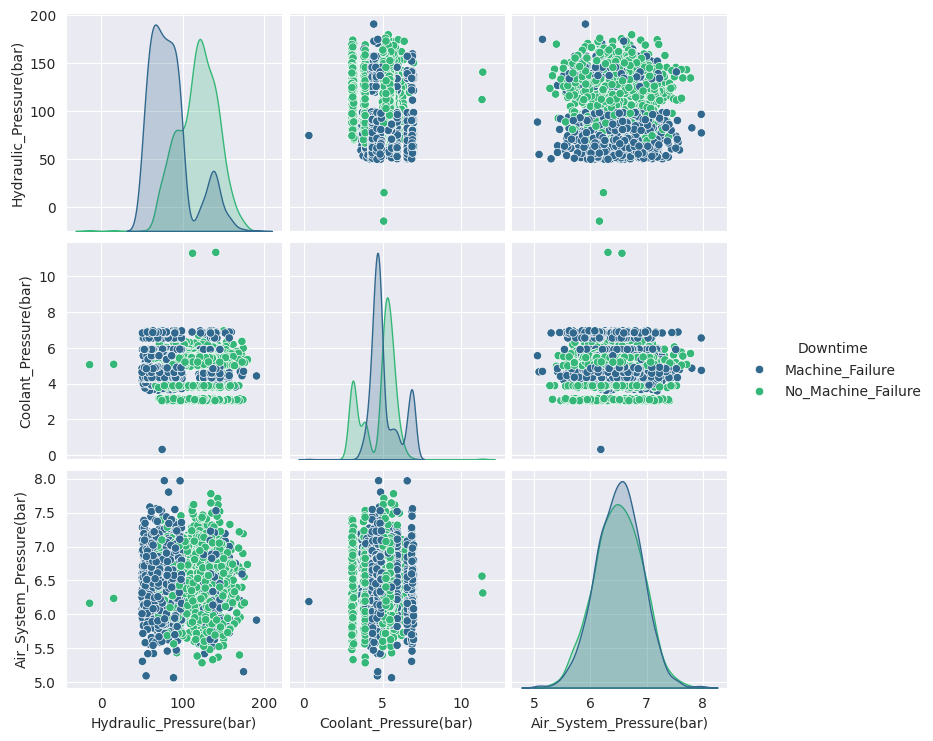

In [9]:
sns.pairplot(data, vars=['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)'], hue = 'Downtime', palette='viridis')

Air system pressure has an overlapping symmetric curve for both downtime causes.

Lower the hydraulic pressure for varying air system pressure, higher the chances of machine_failure downtime.

Higher the hydraulic pressure for varying air system pressure,, the downtime is caused mostly by no_machine_failure causes.

Higher coolant pressures also can cause machine_failure downtime.


In [10]:
target_mapping = {'Machine_Failure' : 1, 'No_Machine_Failure' : 0}
data['Downtime'] = data['Downtime'].map(target_mapping)

In [11]:
corr_data = data[numerical_columns].copy()
corr_data['Downtime'] = data['Downtime']

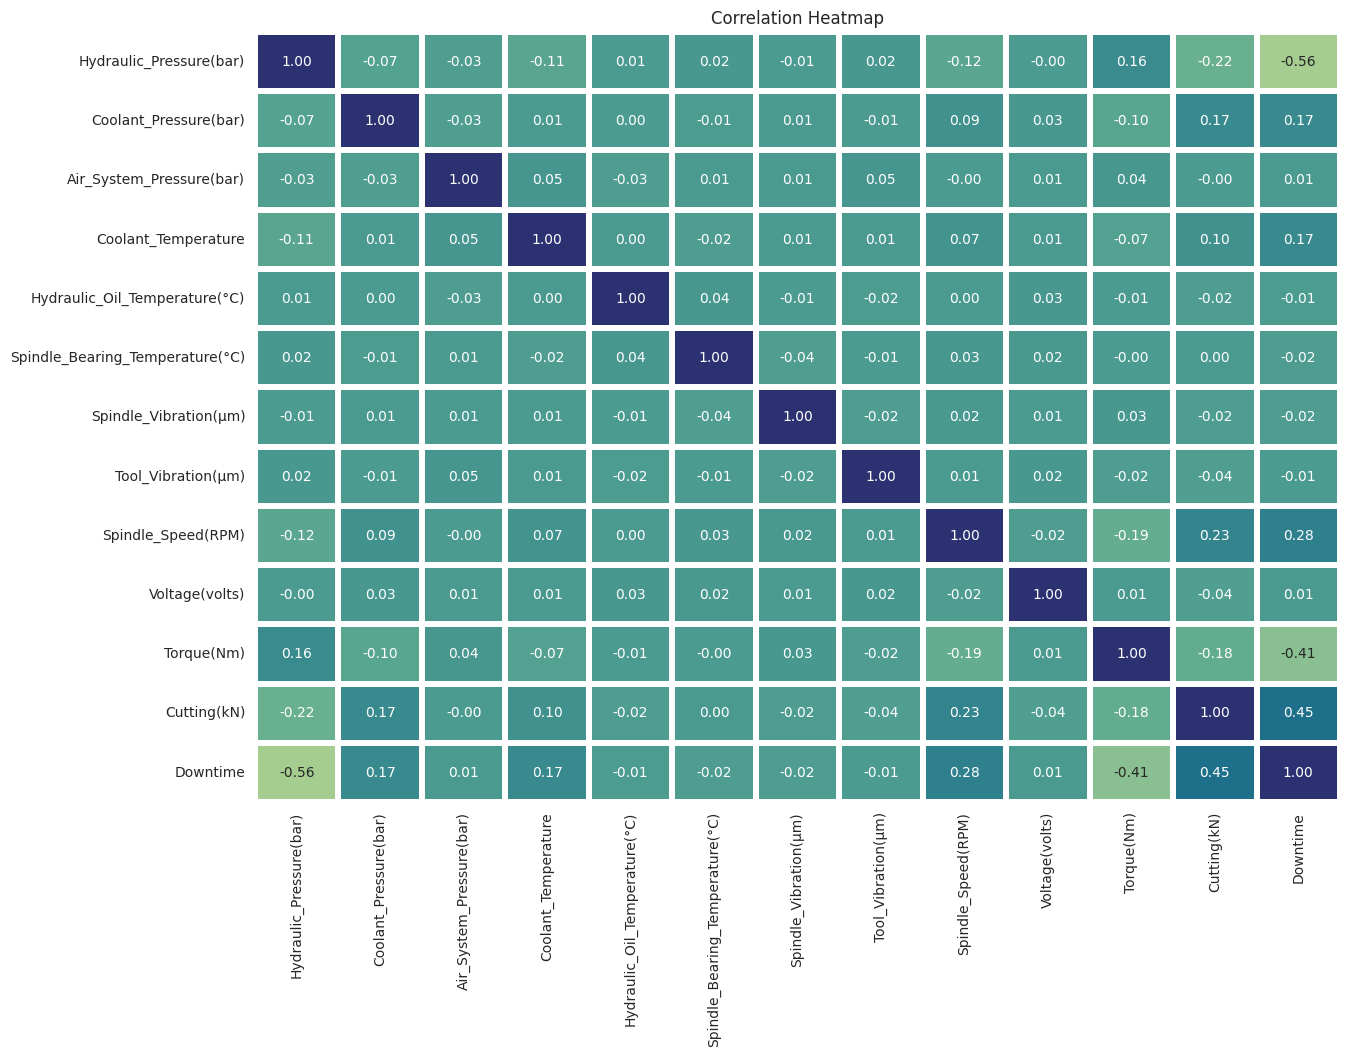

In [12]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix =  corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', linecolor='white', linewidth=3, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

Hydraulic Pressure has a strong negative correlation of -0.56 with Downtime. So higher the hydraulic pressure , lower the likelihood of downtime due to machine failure.

Cutting force has a moderate positive correlation of 0.45 with Downtime. So higher the Cutting force , higher the likelihood of downtime due to machine failure.

Torque has a moderate negative correlation of -0.41 with Downtime. So higher the Torque , lower the likelihood of downtime due to machine failure.

Spindle speed has a moderate positive correlation of 0.28 with Downtime. So higher the spindle speed , chances are there for the downtime due to machine failure.

Coolant pressure and temperature have weak positive correlation of 0.17 with Downtime. So higher the Coolant pressure and temperature ,chances of downtime due to machine failure is there.

The other factors are less correlated to machine failure downtime.
Mild correlations are observed between some columns.
